In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction to NumPy

NumPy (Numerical Python) is a Python package that does three things:

1. Provides an 'array' object;
2. Defines functions that work on those arrays.
3. Provides functions to load and save arrays

## Section 1: NumPy Arrays

NumPy arrays are officially called _ndarray_ because they can be n-dimensional. You can think of an array as a matrix. However, arrays are more flexible: 

* 0-D array = number;
* 1-D array = vector;
* 2-D array = matrix;
* ... and so on

### How to create arrays

There are many ways to create arrays. Let's look at a few of them:

The easiest way to create an array is to build it from a list. Recall that lists have the form `[...]`

In [ ]:
from_list = np.array( [1,2,3,4,5] )
print('From list:')
print(from_list)

You can create a 2-D array from a list of rows. The rows themselves are lists:

In [ ]:
identity = np.array([ [1,0,0], [0,1,0], [0,0,1] ])
print('3x3 identity matrix:')
print(identity)

Some NumPy functions make repetitive tasks easier. Look at the following examples:

In [ ]:
bunch_of_zeros = np.zeros( shape = (4,4) )
print('Using np.zeros:')
print(bunch_of_zeros)

In [ ]:
bunch_of_ones = np.ones( shape = (2,5) )
print('Using np.ones:')
print(bunch_of_ones)

In [ ]:
identity_matrix = np.eye(3) # 3x3 identity matrix
print('Using np.eye:')
print(identity_matrix)

Ranges are especially useful:

In [ ]:
range_by_stepsize = np.arange(start=0, stop=10, step = 1)
print('Using np.arange:')
print(range_by_stepsize)
print()

range_by_num_elements = np.linspace(start=0, stop=10, num = 6)
print('Using np.linspace:')
print(range_by_num_elements)

### Array indexing
How can I get an element from an array? This is similar to matrices. We use square brackets because parentheses are for function calls:

In [ ]:
identity = np.eye(3)

# Recall that indexing starts at 0
# `identity` is a 3x3 matrix
# hence the possible indices are [0, 1, 2]

top_left     = identity[0,0]   # row 0, column 0
middle       = identity[1,1]
bottom_right = identity[2,2]
top_right    = identity[0,2]   # row 0, column 2

Using indexing, we can modify an array in-place:

In [ ]:
identity = np.eye(3)

print('Identity matrix:')
print(identity)
print()

identity[0,0] = 9

print('Modified element [0,0] to 9:')
print(identity)
print()

identity[1,2] = -2

print('Modified element [1,2] to -2:')
print(identity)
print()

### Array slicing

__Slicing__ refers to an operation that extracts a part of an array. For example, how to I get a full row or full column?

In [ ]:
# Example array `arr` has random integers from 0 to 10
# shape (3,4) -> 3 rows, 4 columns
shape = (3,4)
arr = np.random.randint(0, 10, shape)
print('Random array:')
print(arr)
print()

# symbol `:` means all elements in this location
# Therefore, you can read the following as:
#     "arr's first row and all columns
first_row = arr[0, :]
print('First row:')
print(first_row)
print()

# You can read the following as:
#     "arr's row 0 to row 2 (exclusive), and all columns
first_two_rows = arr[0:2, :]
print('First two rows:')
print(first_two_rows)
print()

# Recall that slicing bounds (e.g. 2:4) exclude the last index
# then, 2:4 really means [2, 3] and not [2,3,4]
last_two_column = arr[:, 2:4]
print('Last two column')
print(last_two_column)

### Array properties

Every NumPy _ndarray_ has built-in properties that you can take advantage of:

In [ ]:
arr = np.random.randint(low = 0, high = 10, size = (5,4))
print('Random array:')
print(arr)
print()


# Some properties require calculation
# They must be called with parentheses, like functions:
minimum = arr.min()
maximum = arr.max()

print('Minimum: ', minimum)
print('Maximum: ', maximum)
print()

# Some properties are pre-calculated
# They don't require to be called like functions
num_elements = arr.size
array_shape = arr.shape

print('Number of elements:     ', num_elements)
print('Array shape (row, col): ', array_shape)

## Section 2: NumPy functions and operations
NumPy functions are highly-optimized functions that work on _ndarrays_. What's special about them is that they work on whole arrays, elementwise. Therefore, NumPy functions are perfect for cases when a __for loop__ might make sense.

In [ ]:
arr = np.random.randint(low = 0, high = 10, size = (4,2))
print('Random array:')
print(arr)
print()

# Arithmetic operations {(+), (-), (*), (/), (**), etc} are performed element-wise:
squared2 = arr**2
plus1 = arr + 1

print('arr**2:')
print(squared2)
print()

print('arr + 1:')
print(plus1)
print()

# Non-arithmetic operations are also available:
square_root = np.sqrt(arr)
print('Square root with np.sqrt:')
print(square_root)
print()

### Combining NumPy functions into your own functions

Using NumPy functions and operations, we can create our own functions that work on number __and__ arrays of numbers at the same time.

As an example, let's implement a function that calculates the following function:

$$ L(x, x_0, w) = \frac{1}{\pi} \frac{w}{\sqrt{(x-x_0)^2 + w^2}} $$

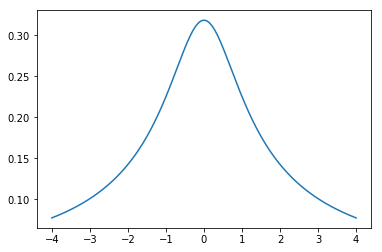

In [3]:
# Syntax is always the same:
#
# def function_name(param1, param2, optional1 = default1, optional2 = default2, ...):
#     (... calculations ...)
#     (... calculations ...)
#     return result

def func(x, center = 0, width = 1):
    numerator = width / np.pi
    denominator = np.sqrt( (x - center)**2 + width**2 )
    return numerator / denominator

# Example plot for this function
# Note that center and width are optional parameters
# I've chosen to keep them at their default values
x = np.linspace(-4, 4, 1024)
y = func(x)

plt.figure()
plt.plot(x, y)
plt.show()

## Section 3 : Loading and saving

To use NumPy with your data, there are ways to load data from a file into NumPy arrays, and save the resulting computations to a file.

### Loading data : np.loadtxt

While there are many loading functions available in NumPy, a common one is [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). This functions is called `loadtxt` because it works on all text-based formats (e.g. `*.txt` and `*.csv`)

__The next cell creates a `tutorial.csv` file that we can then feed into `loadtxt`. Ignore it for now__ 

In [ ]:
np.savetxt('tutorial.csv',
           np.random.randint(0, 100, size = (20, 5)),
           delimiter = ',')

To load numerical data from a file, we must know two things:

1. What is the file name?
2. What character is used to delimit numbers?

The file name is straightforward. However, the delimiter will depend on your input file. For the `CSV` format (which means __C__omma __S__eparated __V__alues, the delimiter is a _comma_.

In [ ]:
# Don't forget to assign the loaded data to a name to which you can refer later
# In this case, it is `loaded_from_file`

loaded_from_file = np.loadtxt('tutorial.csv', delimiter = ',')
print('Loaded data:')
print(loaded_from_file)

### Saving data : np.savetxt

The counterpart to `loadtxt` is [savetxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html). `savetxt` can save an array (__only one__) to a file.

It's pretty much self-explanatory once you know how `loadtxt` works.

In [ ]:
array_to_save = np.zeros( shape = (20, 5) )

np.savetxt('new.csv', array_to_save, delimiter = ',')

## Notebook cleanup

The following cell will clean up the files `tutorial.csv` and `new.csv` that were created by the notebook

In [ ]:
from os import remove
from contextlib import suppress

with suppress(FileNotFoundError):
    for fname in ('tutorial.csv', 'new.csv'):
        remove(fname)